# Assignment

1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

## Part 1

Generate a word cloud based on the raw corpus

In [713]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from IPython.display import Image, display
data = pd.read_csv('hillary-clinton-emails/emails.csv')
data.ix[:,:8].head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00


In [714]:
data.ix[:,8:].head()

,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Let's only keep the text which is relevant for the raw body corpus, which is: ExtractedSubject and ExtractedBodyText, which encompass most of what the message should be about.

In [715]:
data_cut = data[['ExtractedSubject','ExtractedBodyText']].copy()
data_cut

,ExtractedSubject,ExtractedBodyText
0,FW: Wow,NaN
1,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Re: Chris Stevens,Thx
3,FVV: Cairo Condemnation - Final,NaN
4,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
6,"FW: Anti-Muslim film director in hiding, follo...",NaN
7,NaN,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
8,FVV: Secretary's remarks,FYI
9,more on Libya,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd..."


In [716]:
data_csv = data_cut.to_csv()

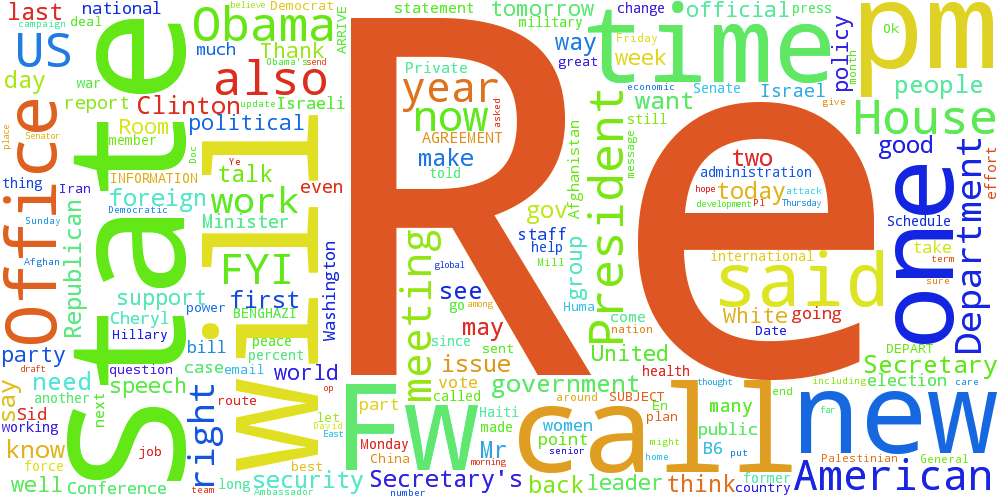

In [739]:
# Credit to - https://github.com/amueller/word_cloud/blob/master/examples/simple.py

# Make the wordcloud
wordcloud = WordCloud(background_color='white', width=1000, height=500).generate(data_csv)
image = wordcloud.to_image()
display(Image('image_raw.png'))
#image.show()

From here, it's clear that words such as Re, Fw, pm (i.e. referring to time), which are not related to the content of the text itself but rather deal with email processing, are disproportiate in the full picture and should be taken out.

## Part 2

a) implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.)

In [718]:
import re
import nltk

## a) Tokenization

The purpose of tokenization is to chop up long strings into individual words or symbols. This allows for further processing of the words.

Let's first put all of the values into 1 column called "Text" and get rid of the NaNs. At this point, we do not care to distinguish between the content in the subject and the body.

In [719]:
for i in data_cut['ExtractedBodyText']:
    data_cut.loc[len(data_cut)] = [i, 'nan']

In [720]:
data_clean = data_cut.drop('ExtractedBodyText', axis =1)
data_clean.columns = ['Text']
data_clean = data_clean[pd.notnull(data_clean['Text'])]
data_clean.head()

,Text
0,FW: Wow
2,Re: Chris Stevens
3,FVV: Cairo Condemnation - Final
5,Meet The Right Wing Extremist Behind Anti-Musl...
6,"FW: Anti-Muslim film director in hiding, follo..."


### Side-note: Removing capitalization

Convert all of the strings to lowercase while they are whole, as we'll need it later on.

In [721]:
for index, row in data_clean.iterrows():
    row['Text'] = row['Text'].lower()
data_clean.head()

,Text
0,fw: wow
2,re: chris stevens
3,fvv: cairo condemnation - final
5,meet the right wing extremist behind anti-musl...
6,"fw: anti-muslim film director in hiding, follo..."


Now let's do some tokenization.

### Tokenization

In [722]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [723]:
data_tokenized = data_clean.copy()
for index, row in data_tokenized.iterrows():
    row['Text'] = tokenizer.tokenize(row['Text'])
data_tokenized.columns = ['TokenizedText']
data_tokenized.reset_index(drop=True, inplace=True)
data_tokenized.head()

,TokenizedText
0,"[fw, wow]"
1,"[re, chris, stevens]"
2,"[fvv, cairo, condemnation, final]"
3,"[meet, the, right, wing, extremist, behind, an..."
4,"[fw, anti, muslim, film, director, in, hiding,..."


You can now see that the sentences / subject lines are broken up into words within a list, which we can now use to check for stopworkds.

## b) Removing Stopwords 

Let's see what are the stopwords that are in the nltk database that we can remove. 

In [724]:
from nltk.corpus import stopwords # Import the stop word list
stop = stopwords.words('english')

We will also add "fw", "fwd", "fvv", "re", "pm", and "am" to the stopwords.txt list as they are not helpful and in this context.

In [725]:
print(stopwords.words("english") )

['pm', 'am', 'fwd', 'fw', 'fvv', 're', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can'

As a reference to check whether the stopwords have been removed is line 15, where there is "your".

In [726]:
# Remove stop words from "words"
data_no_stop = data_tokenized.copy()
data_no_stop['TokenizedText'] = data_no_stop['TokenizedText'].apply(lambda x: [item for item in x if item not in stop])
data_no_stop.tail(17)

,TokenizedText
12985,"[bottom, page, 1, ambassador, richard, holbroo..."
12986,"[usglc, breakfast, qddr, morning, meeting, see..."
12987,"[passed, senate, 81, 19, start, vote, motion, ..."
12988,[]
12989,"[traffic, bottom]"
12990,"[fyi, forwarded, message]"
12991,"[agree, writing, integrating, first, instance,..."
12992,"[nice, forgot, tell, harrowing, circling, atte..."
12993,"[worth, read]"
12994,"[unsigned, editorials, appear, bloomberg, onli..."


You can see that the stopwords in line 15 is now gone, so we are set!

## c) Stemming

We need to change the words into more standard forms to reduce the inflectual forms, such as "forwarded" in line 12998 and "integrating" in line 12991.

In [727]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [728]:
data_stemming = data_no_stop.copy()
for index, row in data_stemming.iterrows():
    for idx, list in enumerate(row):
        for idx, item in enumerate(list):
            list[idx] = stemmer.stem(item)

In [730]:
data_stemming.tail(17)

,TokenizedText
12985,"[bottom, page, 1, ambassador, richard, holbroo..."
12986,"[usglc, breakfast, qddr, morn, meet, see, spee..."
12987,"[pass, senat, 81, 19, start, vote, motion, pro..."
12988,[]
12989,"[traffic, bottom]"
12990,"[fyi, forward, messag]"
12991,"[agre, write, integr, first, instanc, stay, la..."
12992,"[nice, forgot, tell, harrow, circl, attempt, l..."
12993,"[worth, read]"
12994,"[unsign, editori, appear, bloomberg, onlin, pr..."


As you can see, "forwarded" in line 12998 is now "forward" and "integrating" in line 12991 is now "integ". However, this the resulting words are not pretty.

### d) generate a new word cloud

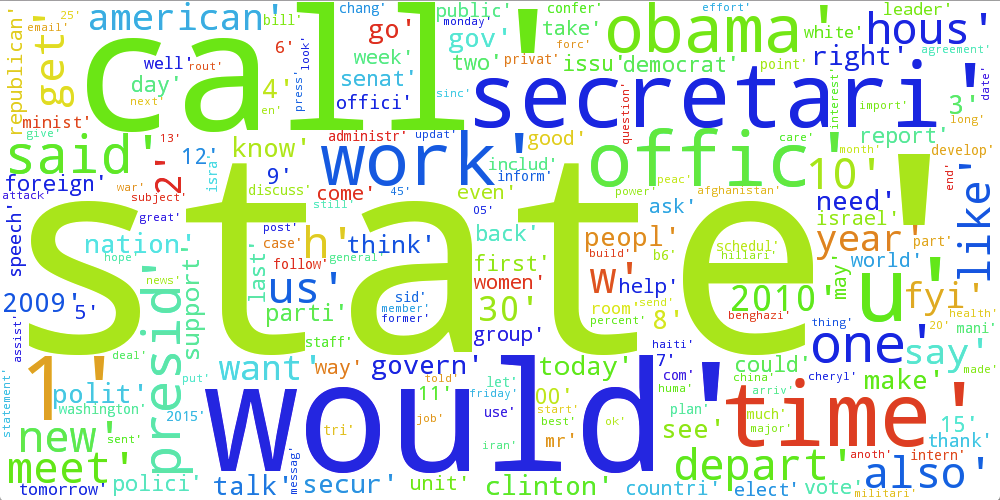

In [734]:
data_csv_new = data_stemming.to_csv()

wordcloud_new = WordCloud(background_color='white', width=1000, height=500).generate(data_csv_new)
image_new = wordcloud_new.to_image()
display(Image('image_new.png'))
#image_new.show()

Commentary: the resulting words are quite strange - Bloomberg is not something that is expected to have come up. 

## Extra - Cleaning - Removing Words / #s < 4 Letters

Remove anything that is shorter than 5 letters or numbers long (to remove single numbers or single letters or simple words).

In [732]:
data_extra = data_stemming.copy()
for index, row in data_extra.iterrows():
    for index, item in row.iteritems():
        for i in item:
            if len(i) < 4:
                item.remove(i)
data_extra.head()

,TokenizedText
0,[]
1,"[chris, steven]"
2,"[cairo, condemn, final]"
3,"[meet, right, wing, extremist, behind, anti, m..."
4,"[anti, muslim, film, director, hide, follow, l..."


#### Tokenized, Stop-word-removed and Stemmed Corpus

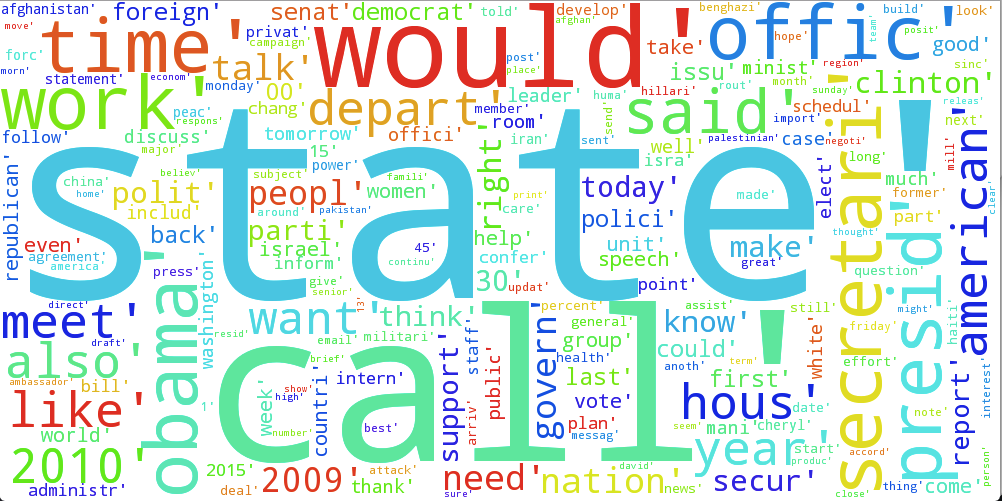

In [735]:
data_csv_new_lt = data_extra.to_csv()

wordcloud_lt = WordCloud(background_color='white', width=1000, height=500).generate(data_csv_new_lt)
image_new_lt = wordcloud_lt.to_image()
display(Image('image_new_lt.png'))
#image_new_lt.show()

I'm not sure why the words have a ' after them, but the resuts are as they should be.
Let's compare it with the original raw corpus:

#### Raw Corpus (Old)

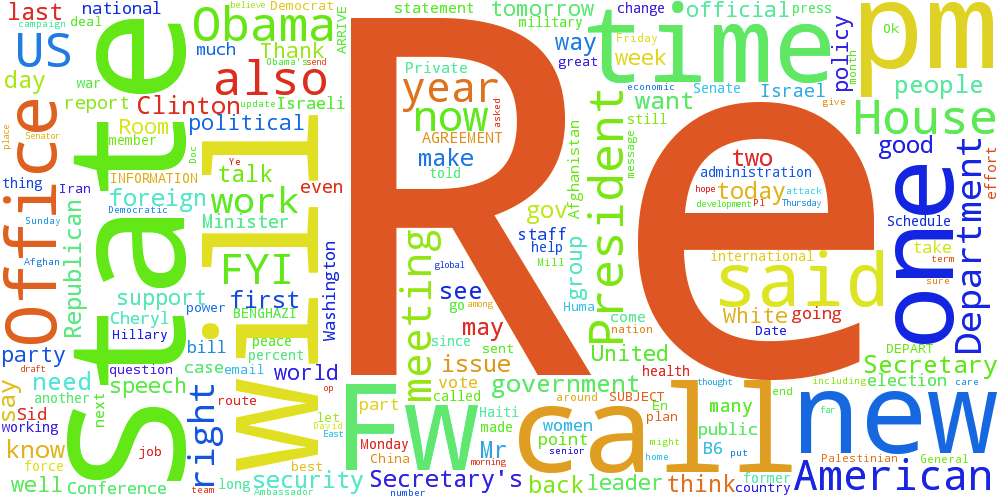

In [740]:
display(Image('image_raw.png'))

## Discussion 

When you compare the raw corpus with the tokenized, stop-word-removed, and stemmed word graphs, you'll see that some new words have come up in the new corpus, such as: state, secretary, president, and others. In the old one, we had a lot of junk, like pm and re.

There are not many new insights to gain, as many of the words in the final Wordcloud are logically relevant to her campaign / work: secretary, Obama, call, state, time, etc. 